# I) The Preliminaries

First, we will initialize this notebook with some import, functions definitions and training data. You can press Shift+Enter for the next few cells to excute them before we discuss the actual content.

## Importing Numpy and Matplotlib

First, we import numpy (for manipulating arrays) and matplotlib (for visualization).

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

## The data
We are again going to work on predicting votes given income and age. The following cells define 3 arrays containing data we got from a survey. Each line represent a person. The first column represents the income (in 100 000 yen/months), the second column represents the age, and the third represents the vote (0: left-wing party, 1:right-wing party)

First, we have the data we will use for training our Neural Network:

In [2]:
vote_data_for_training = np.array([
       [ 51.,  49.,   0.],
       [ 45.,  53.,   0.],
       [ 41.,  68.,   1.],
       [ 72.,  70.,   1.],
       [ 33.,  38.,   1.],
       [ 51.,  26.,   0.],
       [ 39.,  32.,   0.],
       [ 60.,  37.,   0.],
       [ 43.,  45.,   0.],
       [ 43.,  33.,   0.],
       [ 48.,  68.,   1.],
       [ 49.,  43.,   0.],
       [ 50.,  70.,   1.],
       [105.,  52.,   1.],
       [ 35.,  35.,   0.],
       [ 47.,  37.,   0.],
       [ 48.,  47.,   0.],
       [ 54.,  29.,   0.],
       [ 85.,  38.,   1.],
       [ 30.,  42.,   1.],
       [ 32.,  31.,   1.],
       [ 39.,  48.,   1.],
       [ 49.,  69.,   1.],
       [ 77.,  60.,   1.],
       [100.,  48.,   1.],
       [ 50.,  47.,   0.],
       [ 45.,  54.,   1.],
       [ 56.,  63.,   1.],
       [109.,  39.,   1.],
       [ 24.,  24.,   1.],
       [ 38.,  20.,   0.],
       [ 44.,  45.,   0.],
       [ 63.,  66.,   1.],
       [ 49.,  69.,   1.],
       [ 23.,  20.,   0.],
       [ 41.,  39.,   0.],
       [ 97.,  25.,   1.],
       [ 99.,  50.,   1.],
       [ 44.,  60.,   1.],
       [ 32.,  22.,   0.],
       [ 57.,  40.,   0.],
       [ 55.,  65.,   1.],
       [ 61.,  32.,   0.],
       [ 35.,  49.,   1.],
       [ 49.,  43.,   0.],
       [ 33.,  30.,   0.],
       [ 31.,  29.,   0.],
       [ 33.,  31.,   1.],
       [ 32.,  35.,   1.],
       [ 41.,  35.,   0.],
       [ 25.,  20.,   1.],
       [ 48.,  52.,   0.],
       [ 41.,  58.,   1.],
       [ 35.,  53.,   1.],
       [ 36.,  26.,   0.],
       [ 67.,  60.,   1.],
       [ 31.,  20.,   0.],
       [ 57.,  64.,   1.],
       [ 49.,  64.,   1.],
       [ 69.,  33.,   0.]])

Then, we have some additional data from the same survey that we keep separate for validation.

In [3]:
vote_data_for_validation = np.array([
       [ 39.,  59.,   1.],
       [ 71.,  61.,   1.],
       [ 43.,  46.,   0.],
       [ 43.,  21.,   0.],
       [ 87.,  69.,   1.],
       [ 36.,  43.,   1.],
       [ 38.,  35.,   0.],
       [120.,  50.,   1.],
       [ 36.,  58.,   1.],
       [ 47.,  63.,   1.],
       [ 49.,  44.,   0.],
       [119.,  59.,   1.],
       [ 46.,  45.,   0.],
       [ 33.,  28.,   0.],
       [ 49.,  62.,   1.],
       [ 45.,  40.,   0.],
       [ 91.,  51.,   1.],
       [ 28.,  41.,   1.],
       [ 67.,  39.,   1.],
       [ 91.,  36.,   1.]])

Finally, we have some additional data from still the same survey that we keep separate for testing.

In [4]:
vote_data_for_test = np.array([[ 60.,  64.,   1.],
       [ 68.,  57.,   1.],
       [ 40.,  41.,   0.],
       [ 53.,  40.,   0.],
       [118.,  56.,   1.],
       [ 69.,  60.,   1.],
       [ 85.,  52.,   1.],
       [ 45.,  64.,   1.],
       [ 34.,  24.,   0.],
       [ 58.,  42.,   0.],
       [ 36.,  58.,   1.],
       [ 46.,  32.,   0.],
       [ 49.,  26.,   0.],
       [ 33.,  47.,   1.],
       [106.,  63.,   1.],
       [ 47.,  70.,   1.],
       [ 30.,  23.,   0.],
       [ 30.,  38.,   1.],
       [119.,  49.,   1.],
       [ 28.,  35.,   1.]])

## Quick review of some aspects of numpy arrays

We briefly discussed some aspects of numpy on our sencond class. Let us review here some aspects that will be useful to us for manipulating the data above.
First, you get the data of person i by using data[i]:

In [5]:
print("Data of person 4 is:", vote_data_for_training[4])

Data of person 4 is: [33. 38.  1.]


You get the value of each column like this:

In [6]:
print("Income of person 4 is:", vote_data_for_training[4,0])
print("Age of person 4 is:", vote_data_for_training[4,1])
print("Vote of person 4 is:", vote_data_for_training[4,2])

Income of person 4 is: 33.0
Age of person 4 is: 38.0
Vote of person 4 is: 1.0


The data represents a matrix of shape Nx3, with N= the number of persons in the survey. You can get the shape of the array with the `.shape` attribute:

In [7]:
print("The shape of the training data is", vote_data_for_training.shape)

The shape of the training data is (60, 3)


The above indicates that there are 60 persons in our data, and we have 3 informations for each (their income, age and vote)

You can take a **slice** of the data with the `:` sign.

In [8]:
print("Data for persons 4 to 10:")
print(vote_data_for_training[4:11])

Data for persons 4 to 10:
[[33. 38.  1.]
 [51. 26.  0.]
 [39. 32.  0.]
 [60. 37.  0.]
 [43. 45.  0.]
 [43. 33.  0.]
 [48. 68.  1.]]


Likewise, you can take slices on the other dimension (the columns):

In [9]:
print("income and age data for persons 4 to 10:")
print(vote_data_for_training[4:11, 0:2])

income and age data for persons 4 to 10:
[[33. 38.]
 [51. 26.]
 [39. 32.]
 [60. 37.]
 [43. 45.]
 [43. 33.]
 [48. 68.]]


In [10]:
print("Vote data for persons 4 to 10:")
print(vote_data_for_training[4:11, 2:])

Vote data for persons 4 to 10:
[[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]]


## Some visualisation functions

Now we define some functions to help us visualize our data and the predictions of our models. If you are not familiar with python, numpy and matplotlib, it might be difficult to understand the code in these functions. But it is fine. You can just use them as "black boxes", without understanding them.

The first function will be used to plot our data on a income/age graph. Persons voting for the left-wing party are represented in red. Persons voting for the right-wing party are represented in blue.

In [11]:
def plot_vote_data(vote_data, plot_title):
    cmap, norm = matplotlib.colors.from_levels_and_colors([-1,0.5,2], ["red", "blue"])
    plt.scatter(vote_data[:,0], vote_data[:,1], c=vote_data[:,2], cmap=cmap, norm=norm)
    plt.gca().set_xlabel("Income")
    plt.gca().set_ylabel("Age")
    plt.gca().set_title(plot_title)

For example, let us plot our training data:

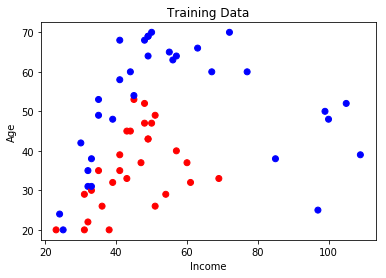

In [12]:
plot_vote_data(vote_data_for_training, "Training Data")

Next, we define a function that will let us visualize the predictions of a model. Again, the details will be difficult to understand without some familiarity with numpy and matplotlib. So just use it even if you do not understand the definition.

In [13]:
import chainer
income_space = np.linspace(10, 130, 100)
age_space = np.linspace(15, 72, 100)
income_grid, age_grid = np.meshgrid(income_space, age_space)

def visualize_model_predictions(model):
    with chainer.using_config('train', False):
        reshaped_mb = np.hstack((income_grid.reshape(-1, 1), age_grid.reshape(-1, 1))).astype(np.float32)
        predictions = model(reshaped_mb)
        if isinstance(predictions, chainer.Variable):
            predictions = predictions.array
        reshaped_predictions = predictions.reshape(income_grid.shape)
        plt.contourf(income_grid, age_grid, reshaped_predictions,  50,cmap="RdBu", alpha = 0.7)
        plt.colorbar()

In order to test our function, let us define a "very naive model" that will simply predict that people that have an income above 50 will vote for the right-wing party.

In [14]:
def very_naive_model(income_age):
    prediction = (income_age[:,:1]>50)  # 1 if income>50 else 0
    return prediction.astype(np.float)

Note that we defined this function to work on **batches** of input, like our neural networks will. This mean that we can directly pass a batch of input as an array, and get all the predictions at once:

In [15]:
very_naive_model(vote_data_for_training[4:11])  # Computing predictions for persons 4 to 10

array([[0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.]])

We can then plot the predictions of our model like this:

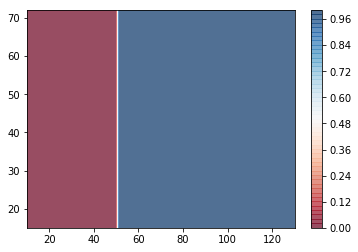

In [16]:
visualize_model_predictions(very_naive_model)

Let us write a function that will tell us how many of the persons in our test data are predicted correctly. Again, you do not need to understand the details of the function. Just how to use it.

In [17]:
def compute_model_accuracy(model, data):
    with chainer.using_config('train', False):
        input_data = data[:,:2].astype(np.float32)
        target_data = data[:,2:].astype(np.int32)
        predictions = model(input_data)
        if isinstance(predictions, chainer.Variable):
            predictions = predictions.array
        predictions = np.round(predictions)
        nb_corrects = np.sum(predictions == target_data)
        nb_total = len(data)
        print(f"Accuracy on this data is {nb_corrects}/{nb_total}")
    

We can now evaluate our very simple model on our test data:

In [18]:
compute_model_accuracy(very_naive_model, vote_data_for_test)

Accuracy on this data is 12/20


We can also check this accuracy visually by visualizing both the test data and the predictions of our model. Using the two functions we have defined above:

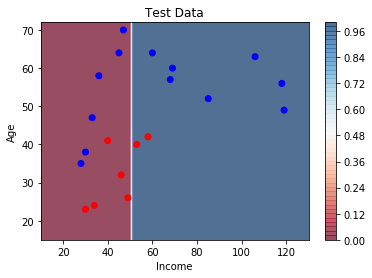

In [19]:
visualize_model_predictions(very_naive_model)
plot_vote_data(vote_data_for_test, "Test Data")

As you can see above, 6 blue dots and 2 red dots are misclassified. So the model makes 8 errors out of 20 examples. So accuracy is indeed 12/20.

## Interogating the model
Finally, just for fun, let us have a simple function that will ask our age and income, and tells us which party we vote for.

In [20]:
def ask_model(model):
    your_age = float(input("What is your age?"))
    your_income = float(input("How much money do you make per year (x 100 000 yen)?"))
    input_as_array = np.array([[your_income, your_age]]).astype(np.float32)
    prediction = model(input_as_array)
    if isinstance(prediction, chainer.Variable):
        prediction = prediction.array
    print()
    if prediction[0,0] > 0.5:
        print("Then I guess you must be voting for the Right-wing party")
    else:
        print("Then surely you vote for the left-wing party")

Then we can interogate the model like this: (be sure to enter your age and income after you have executed the cell, or it will block the execution of other cells)

In [21]:
ask_model(very_naive_model)

What is your age?67
How much money do you make per year (x 100 000 yen)?55

Then I guess you must be voting for the Right-wing party


# II)Introduction to Chainer
We are going to use a deep learning library called **chainer**. We do a few convenient imports:

In [23]:
import chainer
from chainer import Variable, Chain
import chainer.functions as F, chainer.links as L

Chainer provides us with little building blocks for neural networks known as functions and links. A function is simply that: a function that takes a row-vector or a matrix as input, and produces a row-vector or a matrix as output.

A Link is function with parameters. It also takes a row-vector or a matrix as input, and produces a row-vector or a matrix as output. But it also has parameters attached to it.

Today, we only need two chainer functions and one chainer link.

1. The function `F.sigmoid` computes the logistic function of a vector ( $\sigma(x)=\frac{1}{1+e^-x}$)
2. The function `F.sigmoid_cross_entropy` computes the Cross-Entropy Loss.
3. The link `L.Linear(K,N)` computes the score function of a fully-connected layer of N neurons with K inputs each.

When you use a chainer function on an array, its output and intermediate results will be put in a chainer `Variable`. The chainer `Variable` initially contains only the ouptput of the function (which you can access with the `.array` member). After you use backpropagation, it will also contains the gradient in the `grad` member.

Before we start, we should mention a technical subtlety about number types in Python, numpy and chainer.
## Types of Numbers
This discussion is unfortunately a bit technical, but it will help you understand why you see many `.astype(np.float32)` and `.astype(np.int32)` in the code below. 

A computer has different systems for representing a number. Mostly it depends on two aspects: 
1. the nature of the number: if it is an integer (noted *int*) or not (noted *float*)
2. the precision of the representation (32bits or 64bits).

By default, chainer only accepts numbers with 32bits precision. It uses 32bits floats for the parameters of the models, and 32bits int for representing classes.

Unfortunately, by default, numpy always use 64 bits float. This mean that when we have an input represented by a numpy array, we will need to convert it to 32 bits with the methods `.astype(np.float32)` and `.astype(np.int32)`.

For example, the data we have created above is in 64 bits by default. We can convert it to 32 bits:

In [24]:
print("Data as 64 bits array:")
print(vote_data_for_test[0:5])
print("type is:", vote_data_for_test[0:5].dtype)

Data as 64 bits array:
[[ 60.  64.   1.]
 [ 68.  57.   1.]
 [ 40.  41.   0.]
 [ 53.  40.   0.]
 [118.  56.   1.]]
type is: float64


In [25]:
print("Data as 32 bits array:")
print(vote_data_for_test[0:5].astype(np.float32))
print("type is:", vote_data_for_test[0:5].astype(np.float32).dtype)

Data as 32 bits array:
[[ 60.  64.   1.]
 [ 68.  57.   1.]
 [ 40.  41.   0.]
 [ 53.  40.   0.]
 [118.  56.   1.]]
type is: float32


Now, Let us see this in practice, first with the `F.sigmoid` function.

## `F.sigmoid`
As a quick example, let us define a simple row-vector:

In [27]:
my_input = np.array([[1,2,3,4,5]]).astype(np.float32)
print("my_input:",my_input)

my_input: [[1. 2. 3. 4. 5.]]


Let us apply the `F.sigmoid` chainer function:

In [28]:
my_output = F.sigmoid(my_input)

print(my_output)

variable([[0.7310586  0.8807971  0.95257413 0.9820138  0.9933071 ]])


As you can see above, the output is a variable containing an array with the logistic function applied to each of its elements. We can get the numpy array inside the variable with the `.array` member:

In [29]:
print(my_output.array)

[[0.7310586  0.8807971  0.95257413 0.9820138  0.9933071 ]]


The variable output contains an additional member `.grad`. This will contains the gradient of the variable if we apply backpropagation. For now it only contains `None`. (`None` is the default Python value for expressing that something is not specified or is missing):

In [30]:
print(my_output.grad)

None


We can also directly give a batch of row-vector input to the `F.sigmoid` function. By giving it a matrix as input:

In [31]:
my_batch_input = np.array([[1,2,3,4,5], [3,4,-3,-4,8], [7,5,6,7,4]]).astype(np.float32)

The `F.sigmoid` function will compute the output for all row-vectors at once:

In [32]:
my_batch_output = F.sigmoid(my_batch_input)

print(my_batch_output)

variable([[0.7310586  0.8807971  0.95257413 0.9820138  0.9933071 ]
          [0.95257413 0.9820138  0.04742587 0.01798621 0.99966466]
          [0.99908894 0.9933071  0.99752736 0.99908894 0.9820138 ]])


## `L.Linear`

The `L.Linear` link will represent the parameters of a fully connected layer. We first create a `L.Linear` instance by calling `L.Linear(K, N)`

For example, let us say we want to create a fully-connected layer of 3 neurons with 5 inputs each:


In [35]:
layer_1 = L.Linear(5, 3)

`layer_1` contains parameters that we can access with the `.W` and `.b` members. `layer_1.W` represents the weights of the neurons as a 3x5 matrix (5 weights for each neuron). `layer_1.b` represents the bias of each neuron as a 3-dimensional vector.

In [36]:
print("Weights:")
print(layer_1.W)
print("bias:")
print(layer_1.b)

Weights:
variable W([[-0.24495839  0.4143717  -0.2629712  -0.7970546   1.0916184 ]
            [-0.53969276  0.3542558  -0.12362791 -0.41512576  0.12837027]
            [ 0.36524898 -0.17374511 -0.6605162   0.20640011  0.8300486 ]])
bias:
variable b([0. 0. 0.])


Note that `layer_1.W` is initialized with random values. (while we usually initialize the bias with 0s). Note that `layer_1.W` and `layer_1.b` are both chainer `Variable`. Currently we have not applied backpropagation, so their `.grad` member is set to uninitialized values:


In [38]:
print("Weights gradients:")
print(layer_1.W.grad)
print("bias gradients:")
print(layer_1.b.grad)

Weights gradients:
[[nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]]
bias gradients:
[nan nan nan]


In [39]:
print("my_input:", my_input)
my_output = layer_1(my_input)
print("output of layer_1:", my_output)

my_input: [[1. 2. 3. 4. 5.]]
output of layer_1: variable([[ 2.0647454 -1.2207167  3.012054 ]])


We can also give several row vector at once:

In [40]:

print("my_batch_input:")
print(my_batch_input)
print()
my_batch_output = layer_1(my_batch_input)
print("output of layer_1:")
print(my_batch_output)

my_batch_input:
[[ 1.  2.  3.  4.  5.]
 [ 3.  4. -3. -4.  8.]
 [ 7.  5.  6.  7.  4.]]

output of layer_1:
variable([[ 2.0647454 -1.2207166  3.0120537]
          [13.63269    2.8562937  8.1971035]
          [-2.4335856 -5.1407366  2.4899154]])


## Combining `L.Linear` and `F.sigmoid`
As we have seen in class, a single neuron computes a linear function followed by a logistic function:
$output = \sigma(\theta_0 + \theta_1\times x_1 + \theta_2\times x_2 + ...)$ 

`L.Linear` will compute the linear score function of each neuron (3 neurons in our case). If we then apply `F.sigmoid`, we will get the final output of the three neurons.

In [41]:
output_layer_1 = F.sigmoid(layer_1(my_input))
print("output of first layer of neuron for my_input:")
print(output_layer_1)

output of first layer of neuron for my_input:
variable([[0.8874291  0.22781035 0.9531157 ]])


This also works with a batch of input:

In [42]:
batch_output_layer_1 = F.sigmoid(layer_1(my_batch_input))
print("output of first layer of neuron for my_batch_input:")
print(batch_output_layer_1)

output of first layer of neuron for my_batch_input:
variable([[0.8874291  0.22781035 0.9531157 ]
          [0.9999988  0.94564307 0.9997246 ]
          [0.08064723 0.00581932 0.9234318 ]])


## `F.sigmoid_cross_entropy`
`F.sigmoid_cross_entropy` is a function that will compute our cross-entropy loss. We discussed in class the formula for the cross-entropy loss. But here, we just need to apply the function.

It takes 2 parameters : `F.sigmoid_cross_entropy(prediction, target)`.

`prediction` is the output of our classifier: a value between 0 and 1 that indicates the belief that the input belongs to class 1  (ie. =1 if certain input is of class 1; =0 if certain input is of class 0; =0.5 if uncertain)

`target` is the actual class of the input. It should be of type `np.int32` and equal to 0 **or** 1.

In [44]:
my_prediction = np.array([[0.8]]).astype(np.float32)
my_target = np.array([[1]]).astype(np.int32)

loss = F.sigmoid_cross_entropy(my_prediction, my_target)

print("loss is", loss)

loss is variable(0.37110066)


Like the other functions, `F.sigmoid_cross_entropy` can take batches of input:

In [45]:
my_batch_predictions = np.array([[0.8],[0.1], [0.99]]).astype(np.float32)
my_batch_targets = np.array([[1], [1], [0]]).astype(np.int32)

print("batched predictions:")
print(my_batch_predictions)


print("batched targets:")
print(my_batch_targets)
loss = F.sigmoid_cross_entropy(my_batch_predictions, my_batch_targets)

print("averages loss for the 3 predictions is:", loss)

batched predictions:
[[0.8 ]
 [0.1 ]
 [0.99]]
batched targets:
[[1]
 [1]
 [0]]
averages loss for the 3 predictions is: variable(0.77381945)


## Backpropagation

Once we have computed the loss, we can ask chainer to compute the gradient for us by calling `loss.backward()`.

Let us try with the elements we have already created.

We have defined in the previous cells some batched input `my_batch_input`, a linear layer for a 3-neurons fully connected layer with 5 inputs: `layer_1`, and a batch of 3 target classes `my_batch_targets`.

To make a class prediction, we need to connect our 3 neurons to a final single neuron with 3 inputs:

In [46]:
final_layer = L.Linear(3,1)

Then we can compute the predictions of our two layers of neurons:

In [47]:
output_layer_1 = F.sigmoid(layer_1(my_batch_input))

predictions = F.sigmoid(final_layer(output_layer_1))

print("predictions:")
print(predictions)

predictions:
variable([[0.6376881 ]
          [0.67166543]
          [0.5162828 ]])


We can then compute the loss:

In [48]:
loss = F.sigmoid_cross_entropy(predictions, my_batch_targets)

print("loss is", loss)

loss is variable(0.60707194)


We can now apply backpropagation to the loss. First, we will reset the gradients of each layer:

In [49]:
layer_1.cleargrads()
final_layer.cleargrads()

Then we call the `.backward` method:

In [50]:
loss.backward()

You can now observe that the gradients of the parameters of `layer_1` have been computed:

In [51]:
print("Weights gradients:")
print(layer_1.W.grad)
print("bias gradients:")
print(layer_1.b.grad)

Weights gradients:
[[ 0.01432946  0.00822647  0.00893445  0.00964232  0.00126887]
 [-0.0007443  -0.00150711 -0.00097721 -0.001338   -0.00376877]
 [ 0.00045572  0.00029693  0.00034407  0.00039045  0.00016196]]
bias gradients:
[ 7.0783868e-04 -6.5767678e-04  4.6129702e-05]


# III) Defining and training a Neural Network
After studying the basic components we are going to use, let us define a full neural network. This is done by creating a python class that inherits from the `chainer.Chain` class.

## Python classes
Since we have not studied how to write a class in python previously, let us discuss the important aspect very briefly.

We have been manipulating different types of python objects previously: strings (like `"this is a string"`), numbers (like `2.3`), numpy arrays (like `np.array([2,3,4])`) or chainer functions (like `F.sigmoid`)

We can also define our own type of objects. In Python, it is called "defining a `class`".

We define a class like this:

In [52]:
class MySimpleClass:
    def __init__(self, my_name):
        self.my_name = my_name
        
    def what_is_your_name(self):
        print("my name is", self.my_name)

The important point in this definition is that we are starting the definition with `class NameOfClass:`

Then we have a list of function definitions (also called **methods** in this case) that must all take `self` as first argument. The functions (methods) can be named and do anything, but there is one special function: the `__init__` function. It will be called when we "instantiate" a class.

"instantiating" a class means creating an object of this class. Like we create a numpy array by instabtiationg the array class: `np.array([2,3,4])`

We instantiate by using the syntax `newly_created_object = NameOfClass(initialisation_parameters)`

For example:

In [53]:
my_new_object = MySimpleClass("Doraemon")

we can then call the methods we have defined on the class by the syntax `object_name.method_name()`. When we do that, the `self` that was used in the method definition become replaced with the object itself.

In [54]:
my_new_object.what_is_your_name()

my name is Doraemon


## Creating a Neural Network class
We define a Neural Network in chainer by defining a new class.

The definition will be like this:


    class NeuralNetworkClassName(chainer.Chain):

        def __init__(self, optional_parameters):
            super().__init__()
            with self.init_scope():
                # define the links used by the network here. eg:
                self.layer_1 = L.Linear(3,4)
                ...

        def other_methods(self, other_params):
        ...



Note the `(chainer.Chain)` after the class name. Note also the `super().__init__()` part and the `with self.init_scope()` part. These are necessary but we will not explain their meaning in detail as they correspond to more advanced aspect of Python. Just remember them as a pattern: you always have to define your Neural Network class like this.

We are now ready to define our first simple Neural Network.

Remember our goal today is to classify voting data. So we need our first layer of neurons to have 2 inputs. Let us start with 5 neurons. Therefore we will instantiate a link `L.Linear(2,5)`. We will then need a final single neuron that takes the ouput of the 5 neurons, and produce a single output: `L.Linear(5,1)`

Thus, we have:

In [55]:
class SimpleNeuralNetwork(chainer.Chain):
    def __init__(self):
        super().__init__()
        with self.init_scope():
            self.layer_1 = L.Linear(2,5)
            self.layer_2 = L.Linear(5,1)
        
    def __call__(self, x):
        return F.sigmoid(self.compute_score(x))
        
    def compute_score(self, x):
        output_of_layer_1 = F.sigmoid(self.layer_1(x))
        score = self.layer_2(output_of_layer_1)
        return score

Note that, in the above, we have separated the computation of the score of the final logistic classifier in a separate method.

Note also that for computing the predictions, we are using the special function name `__call__`, that allows us to use the object as if it was a function.

Now that we have defined our neural network class, we can create an actual Neural Network by instantiating it:

In [80]:
my_simple_neural_network = SimpleNeuralNetwork()

We can check what are the predictions of this neural network on training data and on test data:

Accuracy on this data is 28/60


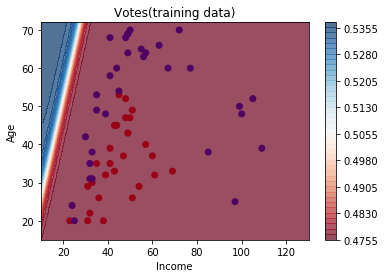

In [81]:
plot_vote_data(vote_data_for_training, "Votes(training data)")
visualize_model_predictions(my_simple_neural_network)
compute_model_accuracy(my_simple_neural_network, vote_data_for_training)

Accuracy on this data is 7/20


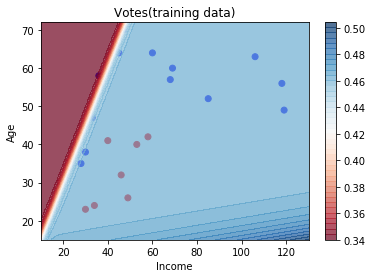

In [66]:
plot_vote_data(vote_data_for_test, "Votes(training data)")
visualize_model_predictions(my_simple_neural_network)
compute_model_accuracy(my_simple_neural_network, vote_data_for_test)

Obviously, it is not very good. It is because the weights of the Neural Network have been randomly initialized. Now we need to train them by applying gradient descent to the loss. Let us see how to do this

## Training our Network
We have already discussed how chainer can compute the gradient of the loss for us with backpropagation.

Therefore, we just need to apply gradient descent.

We can also ask Chainer to apply gradient descent for us. (Just like we ask it to compute gradient automatically). To do that, we are going to use Chainer's `optimizers`.

If we would like to apply Gradient Descent with learning rate equal to 0.1, we would create an optimizer object with `optimizer = chainer.optimizers.SGD(0.1)`.

In practice, today, we are going to use a slightly more advanced optimizer called `Adam`. `Adam` is an *adaptative* grdient descent algorithm. This means mostly that it can adjust its learning rate automatically.

It is perfectly possible to train a Neural Network with standard Gradient Descent (and many people do that in practice), but it is more tedious as we need to adjust the learning rate manually. Therefore, we will use `Adam` in our experiments:

In [82]:
optimizer = chainer.optimizers.Adam()

Now that we have created the optimizer, we "attach" it to our neural network with this commmand:

In [83]:
optimizer.setup(my_simple_neural_network)

We can now define our training loop. Look at what we do:
1. We take some input_batch and target_batch from our training data
2. We reset the gradient of the Neural Network
3. We compute the predicted scores
4. We compute the loss
5. We call `loss.backward()` to compute the gradients
6. We call `optimizer.update()` to update the parameters with the computed gradient
7. We repeat that many times

In [86]:
for num_iteration in range(10000):
    input_batch = vote_data_for_training
    training_input = input_batch[:,:2].astype(np.float32)
    training_target = input_batch[:,2:].astype(np.int32)
    
    my_simple_neural_network.cleargrads()
    
    predicted_scores = my_simple_neural_network.compute_score(training_input)
    loss = F.sigmoid_cross_entropy(predicted_scores, training_target)
    
    if num_iteration%1000 == 0:
        print(f"iteration:{num_iteration} loss:{loss}")
    loss.backward()
    optimizer.update()

iteration:0 loss:variable(0.13626896)
iteration:1000 loss:variable(0.1268856)
iteration:2000 loss:variable(0.11951872)
iteration:3000 loss:variable(0.11368901)
iteration:4000 loss:variable(0.10902619)
iteration:5000 loss:variable(0.10524289)
iteration:6000 loss:variable(0.10211801)
iteration:7000 loss:variable(0.09948159)
iteration:8000 loss:variable(0.09720649)
iteration:9000 loss:variable(0.09519848)


Accuracy on this data is 56/60


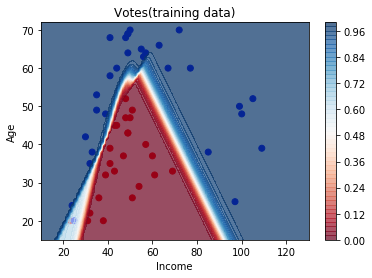

In [87]:
plot_vote_data(vote_data_for_training, "Votes(training data)")
visualize_model_predictions(my_simple_neural_network)
compute_model_accuracy(my_simple_neural_network, vote_data_for_training)

Accuracy on this data is 20/20


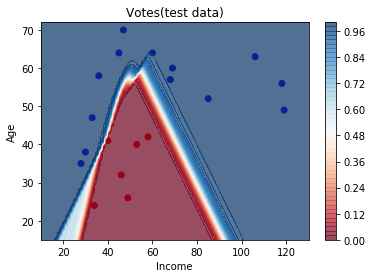

In [88]:
plot_vote_data(vote_data_for_test, "Votes(test data)")
visualize_model_predictions(my_simple_neural_network)
compute_model_accuracy(my_simple_neural_network, vote_data_for_test)

In [79]:
ask_model(my_simple_neural_network)

What is your age?55
How much money do you make per year (x 100 000 yen)?43

Then I guess you must be voting for the Right-wing party


## Playing Around
Now, let us play a bit with the parameters to create neural networks of different shapes.

In [89]:
class BetterNeuralNetwork(chainer.Chain):
    def __init__(self):
        super().__init__()
        with self.init_scope():
            self.layer_1 = L.Linear(2,100)
            self.layer_2 = L.Linear(100,1)
        
    def __call__(self, x):
        return F.sigmoid(self.compute_score(x))
        
    def compute_score(self, x):
        output_of_layer_1 = F.sigmoid(self.layer_1(x))
        score = self.layer_2(output_of_layer_1)
        return score
    
my_better_neural_network = BetterNeuralNetwork()
optimizer = chainer.optimizers.Adam()
optimizer.setup(my_better_neural_network)

Training loop:

In [92]:
for num_iteration in range(10000):
    input_batch = vote_data_for_training
    training_input = input_batch[:,:2].astype(np.float32)
    training_target = input_batch[:,2:].astype(np.int32)
    
    my_better_neural_network.cleargrads()
    
    predicted_scores = my_better_neural_network.compute_score(training_input)
    loss = F.sigmoid_cross_entropy(predicted_scores, training_target)
    
    if num_iteration%1000 == 0:
        print(f"iteration:{num_iteration} loss:{loss}")
    loss.backward()
    optimizer.update()

iteration:0 loss:variable(0.00034468)
iteration:1000 loss:variable(0.0002175)
iteration:2000 loss:variable(0.00013666)
iteration:3000 loss:variable(8.555262e-05)
iteration:4000 loss:variable(5.3406256e-05)
iteration:5000 loss:variable(3.328965e-05)
iteration:6000 loss:variable(2.0715905e-05)
iteration:7000 loss:variable(1.2878754e-05)
iteration:8000 loss:variable(7.980806e-06)
iteration:9000 loss:variable(4.940942e-06)


Now we can test our model:

Accuracy on this data is 60/60


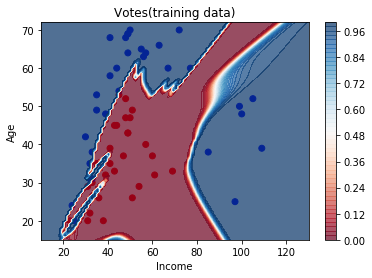

In [93]:
plot_vote_data(vote_data_for_training, "Votes(training data)")
visualize_model_predictions(my_better_neural_network)
compute_model_accuracy(my_better_neural_network, vote_data_for_training)

Accuracy on this data is 18/20


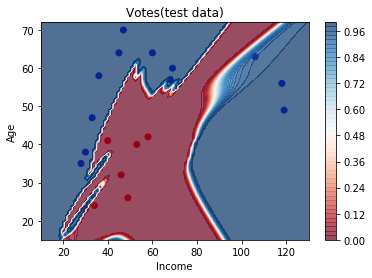

In [94]:
plot_vote_data(vote_data_for_test, "Votes(test data)")
visualize_model_predictions(my_better_neural_network)
compute_model_accuracy(my_better_neural_network, vote_data_for_test)

In [ ]:
ask_model(my_better_neural_network)


## Model Regularization

Now, let us consider some regularization techniques.

In [ ]:
def sample_minibatch(data): 
    return data[np.random.choice(data.shape[0], 20, replace=False), :]

In [ ]:
sample_minibatch(vote_data_for_training)

In [ ]:
class VeryLargeNeuralNetwork(chainer.Chain):
    def __init__(self):
        super().__init__()
        with self.init_scope():
            self.layer_1 = L.Linear(2,100)
            self.layer_2 = L.Linear(100,100)
            self.layer_3 = L.Linear(100,1)
            
    def __call__(self, x):
        return F.sigmoid(self.compute_score(x))
        
    def compute_score(self, x):
        output_of_layer_1 = F.sigmoid(self.layer_1(x))
        output_of_layer_2 = F.sigmoid(self.layer_2(output_of_layer_1))
        score = self.layer_3(output_of_layer_2)
        return score
    
my_very_large_neural_network = VeryLargeNeuralNetwork()
optimizer = chainer.optimizers.Adam()
optimizer.setup(my_very_large_neural_network)

In [ ]:
def compute_model_loss(model, data):
    with chainer.using_config('train', False):
        input_data = data[:,:2].astype(np.float32)
        target_data = data[:,2:].astype(np.int32)
        predictions = model(input_data)
        loss = F.sigmoid_cross_entropy(predictions, target_data)
        return float(loss.array)

In [ ]:
patience = 15

minimum_validation_loss = None
nb_times_validation_loss_increased_in_a_row = 0
for i in range(100000):
    batch = vote_data_for_training# sample_minibatch(vote_data_for_training)
    training_input = batch[:,:2].astype(np.float32)
    training_target = batch[:,2:].astype(np.int32)
    my_very_large_neural_network.cleargrads()
    predictions = my_very_large_neural_network.compute_score(training_input)
    loss = F.sigmoid_cross_entropy(predictions, training_target)
    

    if i%200 == 0:
        validation_loss = compute_model_loss(my_very_large_neural_network, vote_data_for_validation)
        if minimum_validation_loss is not None and minimum_validation_loss <= validation_loss:
            nb_times_validation_loss_increased_in_a_row += 1
        else:
            minimum_validation_loss = validation_loss
            nb_times_validation_loss_increased_in_a_row = 0
        if nb_times_validation_loss_increased_in_a_row > patience:
            break
        previous_validation_loss = validation_loss
        
        print(f"loss:{loss}  validation loss:{validation_loss} {nb_times_validation_loss_increased_in_a_row}")
        
    loss.backward()
    optimizer.update()

In [ ]:

plot_vote_data(vote_data_for_training, "Votes(training data)")
visualize_model_predictions(my_very_large_neural_network)
compute_model_accuracy(my_very_large_neural_network, vote_data_for_training)

In [ ]:
plot_vote_data(vote_data_for_test, "Votes(test data)")
visualize_model_predictions(my_very_large_neural_network)
compute_model_accuracy(my_very_large_neural_network, vote_data_for_test)